C:\Users\HARLOWEWAN\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: RuntimeWarning: overflow encountered in exp
C:\Users\HARLOWEWAN\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: overflow encountered in multiply
C:\Users\HARLOWEWAN\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in sign
C:\Users\HARLOWEWAN\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in maximum


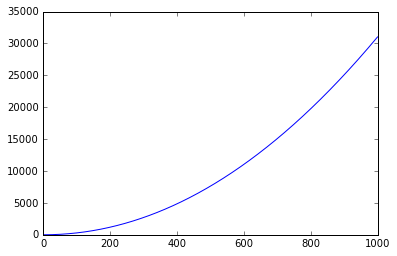

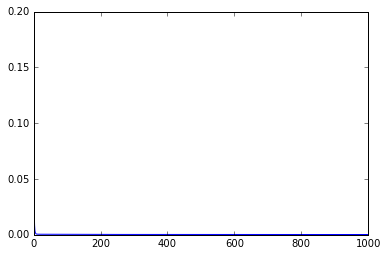

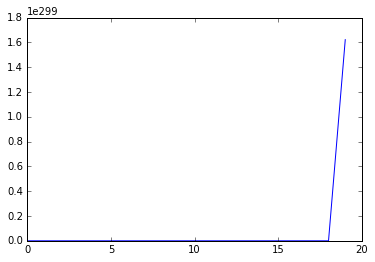

In [32]:
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

def grad(A, x, y):
    return 2 * A.T @ (A @ x - y)
def prox(x_half, tau, lam):
    return np.sign(x_half) * np.maximum(np.absolute(x_half) - (1/2 * tau * lam), 0)
def sparse_solutions(grad, prox, y, A, tau=False, lam=.1):
    if not tau:
        tau=1/np.linalg.norm(A) # o < Ta < 2/ norm(A)
    error = []
    x_hat = np.zeros(len(A[0]))
    for k in np.arange(0, 1000):
        x_half = x_hat - tau * grad(A, x_hat, y)
        x_hat = prox(x_half, tau, lam)
        error += [np.linalg.norm(y - A @ x_hat)**2 / np.linalg.norm(y)**2]
    return x_hat, error

# create a class for encapsulation purposes
class gradient_descent:
    methods = {
        "sparse solutions": sparse_solutions
    }
    flavors = {
        "ordinary least squares": {"grad": grad, "prox": prox},
        #"logistic":{grad: , prox:}
    }
    
    def add_flavor(self, name, grad = grad, prox = prox):
        self.flavors[name] = {"grad": grad, "prox": prox}
        #self.flavors[name]["grad"] = grad
        #self.flavors[name]["prox"] = prox
    def add_method(self, name, method = sparse_solutions):
        self.methods[name] = method
    def implement(self, flavor = "ordinary least squares", method = "sparse solutions"):
        def implementation(y, A, tau=False, lam=.1):
            if not tau:
                tau=1/np.linalg.norm(A)
            return self.methods[method](self.flavors[flavor]["grad"], self.flavors[flavor]["prox"], y, A, tau, lam)
        return implementation
gradient_descent = gradient_descent()


## add a new type: easy!
gradient_descent.add_flavor("logistic", lambda A, x, y: 1 / (1 + np.exp(grad(A, x, y))))

# reads like english, easy to implement
logistic_sparse_solutions = gradient_descent.implement("logistic", "sparse solutions")
ordinary_sparse_solutions = gradient_descent.implement("ordinary least squares", "sparse solutions")

# test
y = y = np.sign(np.random.randn(100))
A = .1 * np.random.randn(len(y), 1000)
plot.figure()
x, error = logistic_sparse_solutions(y, A)
plot.plot(error)
plot.figure()
x, error = ordinary_sparse_solutions(y, A)
plot.plot(error) 
plot.figure()
x, error = gradient_descent.implement("ordinary least squares", "sparse solutions")(y, A, tau=1000000, lam=.000001)
plot.plot(error) # same as before homework because of huge tau